In [14]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# sklearn utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures

# sklearn models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [15]:
path = os.getcwd() + '\\TEST_CSV.csv'
data = pd.read_csv(path, header=0)
data.head()

x = data[["Datetime","Open_BTC","High_BTC","Low_BTC","Close_BTC","Volume_BTC","Dividends_BTC","Stock Splits_BTC",
          "Open_diff_BTC","High_diff_BTC","Close_diff_BTC","Volume_diff_BTC","Open_VET","High_VET","Low_VET","Close_VET",
          "Volume_VET","Dividends_VET","Stock Splits_VET","Open_diff_VET","High_diff_VET","Close_diff_VET","Volume_diff_VET"]]

y_VET = []
for i in range(0, len(data.index) - 1):
    y_VET.append(x.iloc[i + 1]["Close_VET"])
    
y_VET.append(0)
y_VET = np.array([y_VET])

x.head()

,Datetime,Open_BTC,High_BTC,Low_BTC,Close_BTC,Volume_BTC,Dividends_BTC,Stock Splits_BTC,Open_diff_BTC,High_diff_BTC,...,High_VET,Low_VET,Close_VET,Volume_VET,Dividends_VET,Stock Splits_VET,Open_diff_VET,High_diff_VET,Close_diff_VET,Volume_diff_VET
0,2021-10-23 20:28:00+01:00,61067.722656,61067.722656,61067.722656,61067.722656,0,0,0,0.000000,0.000000,...,0.134717,0.134717,0.134717,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,2021-10-23 20:29:00+01:00,61043.609375,61043.609375,61043.609375,61043.609375,0,0,0,-24.113281,-24.113281,...,0.134687,0.134687,0.134687,7680.0,0.0,0.0,-0.000030,-0.000030,-0.000030,7680.0
2,2021-10-23 20:30:00+01:00,61051.675781,61051.675781,61051.675781,61051.675781,0,0,0,8.066406,8.066406,...,0.134875,0.134875,0.134875,231744.0,0.0,0.0,0.000188,0.000188,0.000188,224064.0
3,2021-10-23 20:31:00+01:00,61062.613281,61062.613281,61062.613281,61062.613281,0,0,0,10.937500,10.937500,...,0.134967,0.134967,0.134967,111488.0,0.0,0.0,0.000091,0.000091,0.000091,-120256.0
4,2021-10-23 20:32:00+01:00,61024.718750,61024.718750,61024.718750,61024.718750,0,0,0,-37.894531,-37.894531,...,0.134994,0.134994,0.134994,0.0,0.0,0.0,0.000027,0.000027,0.000027,-111488.0


In [18]:
# Transforms datetime into incremental values
le = LabelEncoder()
x["Datetime"] = le.fit_transform(x["Datetime"])

<ipython-input-18-7058bd905945>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Datetime"] = le.fit_transform(x["Datetime"])


In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, data["Green_VET"], test_size=0.25, random_state=0)

## Logistic Regression

In [20]:
lg = LogisticRegression(random_state=0, max_iter=1000000)
lg.fit(X_train,y_train)
predicted = lg.predict(X_test)

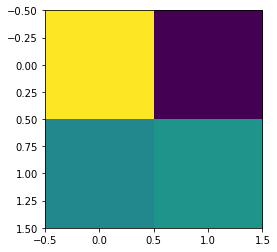

In [21]:
conf_matrix = confusion_matrix(y_test, predicted)
conf_matrix = np.array(conf_matrix)
conf_matrix = pd.DataFrame(data=conf_matrix)

plt.imshow(conf_matrix)

In [22]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

       False       0.64      0.85      0.73      1255
        True       0.77      0.52      0.62      1244

    accuracy                           0.68      2499
   macro avg       0.70      0.68      0.67      2499
weighted avg       0.70      0.68      0.67      2499



## Polynomial Regression

In [38]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x)
X_test_poly = poly.fit_transform(X_test)

lg = LinearRegression()

# Fit
lg.fit(X_poly, y_VET.reshape(-1, 1))

# Obtain coefficients
# print(lg.coef_)

# Predict
print(lg.predict(X_test_poly))

[[0.13177344]
 [0.13710972]
 [0.13323063]
 ...
 [0.13273775]
 [0.1262743 ]
 [0.1364669 ]]
